# Support Vector Machine (Support Vector Machines)

Zuerst werden - wie üblich - ein paar Zufallsdaten erstellt, hier jetzt mit Alter bzw. Einkommensdaten. Auf Basis dieser Daten werden wir dann ein Clustering durchführen:

In [1]:
import numpy as np

# Erstelle zufällige Einkommens / Alter - Daten für N Personen in k Clustern
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

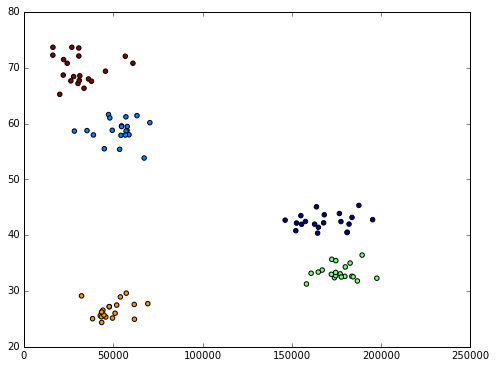

In [11]:
%matplotlib inline
from pylab import *

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

Jetzt führen wir das Support Vector Clustering aus, mit einem linearen Kernel. Dadurch trainieren wir unser Modell:

In [15]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

Mit diesem Code zeichnen wir die entsprechenden Bereiche in das Diagramm ein. Wichtig: Die Farben der Bereiche sind unabhängig von den 

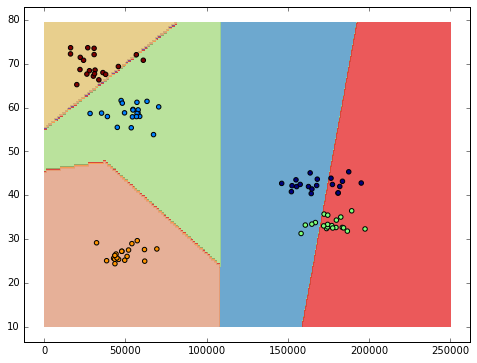

In [16]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 250000, 10),
                     np.arange(10, 80, 0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)

Wie gut funktioniert unser Modell?

In [17]:
print(svc.score(X, y))

0.87


Zu welcher "Gruppe" gehört ein bestimmter Punkt?

In [18]:
print(svc.predict([[200000, 40]]))

[2]


In [19]:
print(svc.predict([[50000, 65]]))

[1]


## Aufgabe

Scikit-learn bietet noch weitere Kernels an, nicht nur den "linear"en Kernel. Schau dir dazu mal die Dokumentation an (online), und probiere die anderen Kernels aus. Klappt es, treten dabei Probleme auf?

Müssen die anderen Kernels die Daten normalsiert übergeben bekommen? Wie funktioniert das mit dem preprocessing - Modul von Scikit-Learn?